In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator
from nbody import load_files, save_movie
from numba import set_num_threads

# N-Body Simulation

In this notebook, we will test the `NBodySimulator` class in `./nbody/simulator.py`. 

In [2]:
# Set the number of threads to use for numba
nthreads = 14
set_num_threads(nthreads)

## Step 2. Simulation.

Visualize the system but use dimensionless units. Set `G=1` and `rsoft=0.01`.

It is VERY slow !!!!

Beacuse the accerlation calculations requires order of NxN calculations!
Could we improve it?

First, we should avoid the two "for" loops in the calculation using python.\
Second, we have many cup cores in our machine. Could we parallelize it?

# `numba`

Step 1. Take out the function to calculate the accerlation from the class into a pure function that only counts math calculations (aka. a kernel).

Step 2. Use the `numba`'s `@jit` micro. 

Results: In my experiments. I got roughly x140 speed up with the @jit(nopython=True). 

Step 3. Try using `@njit` and `prange` in numba.

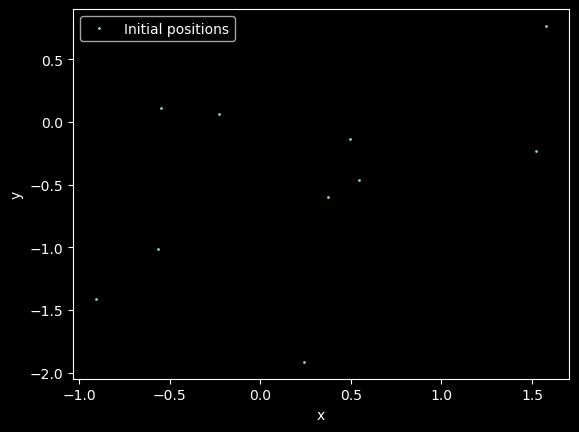

In [6]:
np.random.seed(42)
num_particles = 10
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 20/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.01,method='leapfrog', io_screen=False, io_freq=30, io_header='cluster', visualization=True)
#simulation.evolve(dt=0.02, tmax=1)
# visualize the system
plt.figure()
plt.plot(pts.positions[:, 0], pts.positions[:, 1], 'o', label='Initial positions', markersize=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

1001


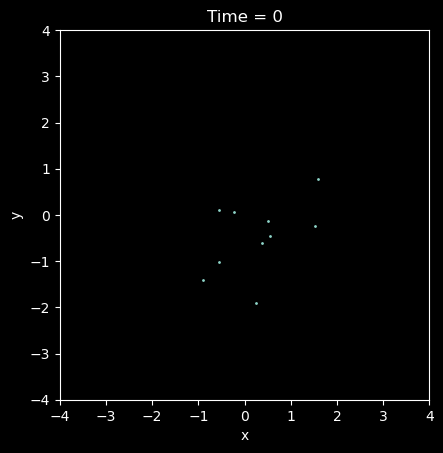

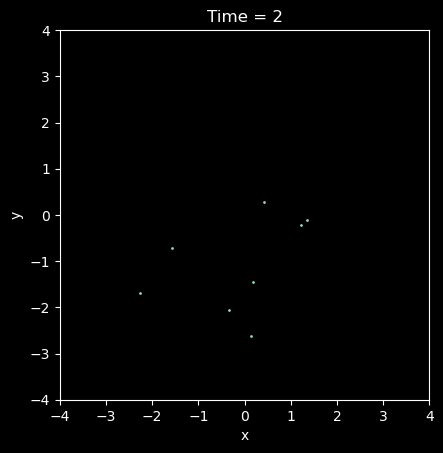

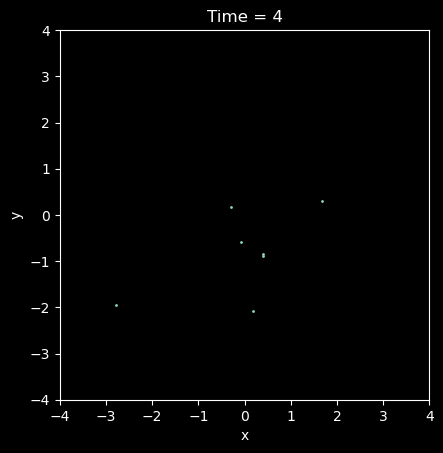

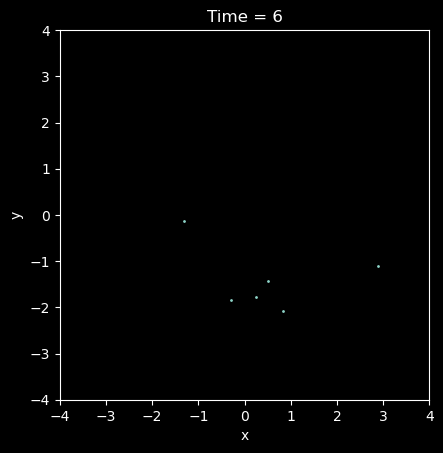

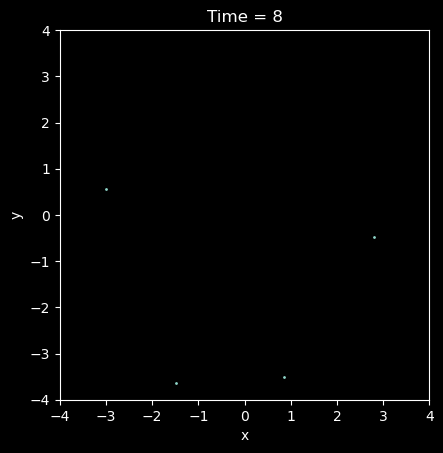

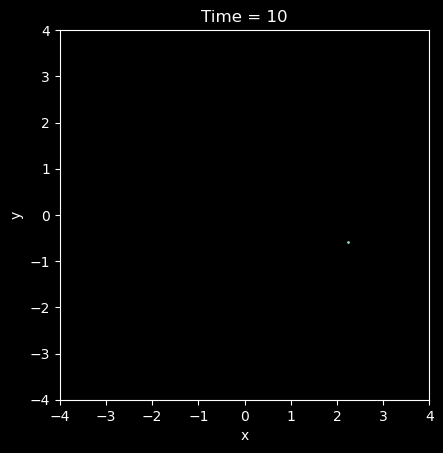

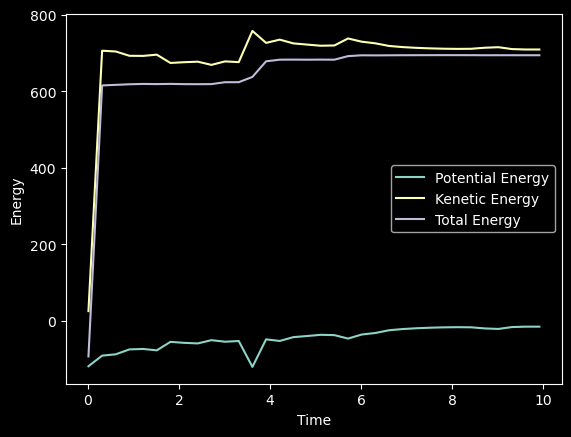

Simulation is done!
['data_cluster/cluster_000000.dat', 'data_cluster/cluster_000030.dat', 'data_cluster/cluster_000060.dat', 'data_cluster/cluster_000090.dat', 'data_cluster/cluster_000120.dat', 'data_cluster/cluster_000150.dat', 'data_cluster/cluster_000180.dat', 'data_cluster/cluster_000210.dat', 'data_cluster/cluster_000240.dat', 'data_cluster/cluster_000270.dat', 'data_cluster/cluster_000300.dat', 'data_cluster/cluster_000330.dat', 'data_cluster/cluster_000360.dat', 'data_cluster/cluster_000390.dat', 'data_cluster/cluster_000420.dat', 'data_cluster/cluster_000450.dat', 'data_cluster/cluster_000480.dat', 'data_cluster/cluster_000510.dat', 'data_cluster/cluster_000540.dat', 'data_cluster/cluster_000570.dat', 'data_cluster/cluster_000600.dat', 'data_cluster/cluster_000630.dat', 'data_cluster/cluster_000660.dat', 'data_cluster/cluster_000690.dat', 'data_cluster/cluster_000720.dat', 'data_cluster/cluster_000750.dat', 'data_cluster/cluster_000780.dat', 'data_cluster/cluster_000810.dat',

In [7]:
simulation.evolve(dt=0.01, tmax=10.01)
fns = load_files('cluster')
print(fns)

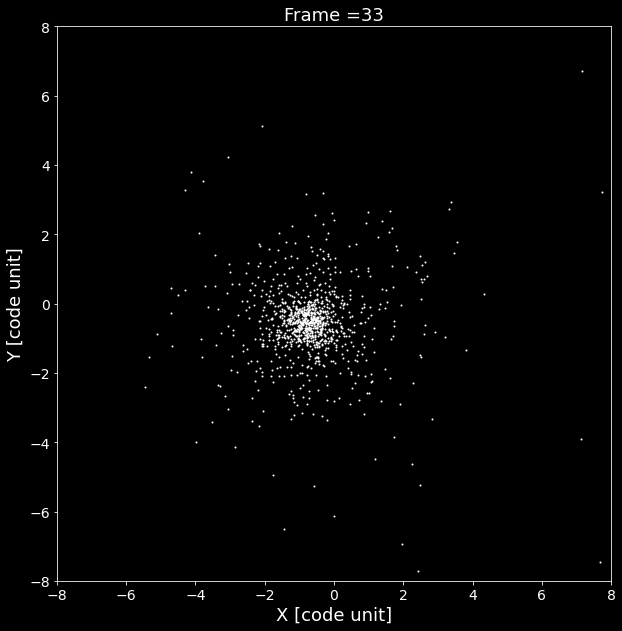

In [5]:
width = 4
save_movie(fns, lengthscale=2*width,filename='cluster.mp4', fps=10)